In [1]:
import pandas as pd
import numpy as np
#pd.options.plotting.backend = "plotly"
import matplotlib.pyplot as plt
from src.trainer import Trainer
from src.lstmpf import NN_Sharpe
from src.viz import plot_results, plot_cumulatives

# Building a simple strategy with LSTM


Now we want to make a strategy with the LSTM on a simple framework.

---

Suppose we have $n=4$ assets and we want to construct a portfolio each day, we will implement the strategy detailed in this [paper](https://arxiv.org/pdf/2005.13665) (Zhang & Al 2021). We have the following strategy:

* First we select a training period where we train a model to predict the weights of a portfolio that maximise the Sharpe Ratio

* Then we test it on the test period (no overlap between the training set and the test set), with the weights predicted, we can compute the sharpe ratio and the annualized return of the strategy


In a first place, we will test it on synthetic data, generated from a Multivariate Gaussian distribution. Under this setup, we know that the Markowitz portfolio maximize the Sharpe Ratio

# Synthetic Data

We use a simple method to generate some synthetic data. We suppose that the return of an asset follows a gaussian distribution, and has a dependancy with the other assets

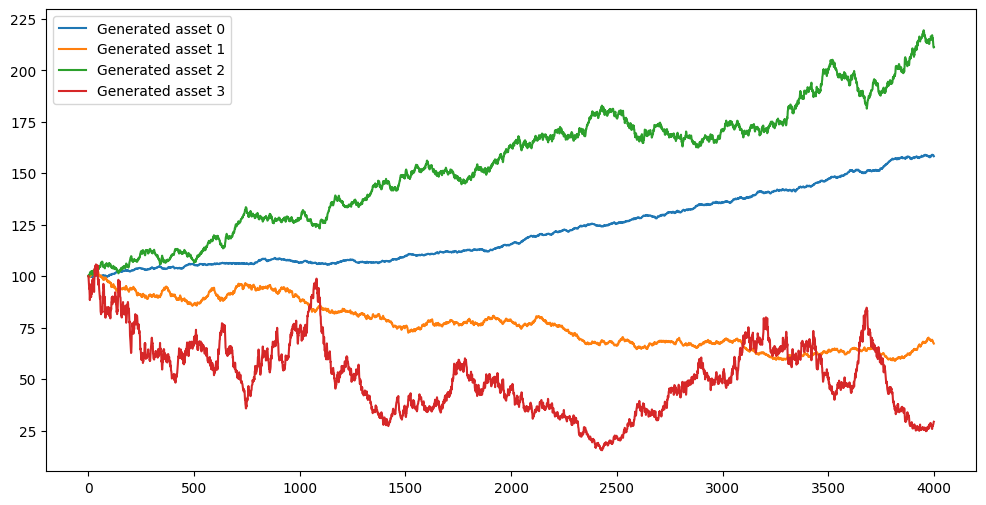

In [2]:
np.random.seed(702)

n=4000

mu = np.array([ 0.01056076, 0.00248467,  0.02553161,  0.01009022]) /100
Sigma = np.array([[ 1.01405883e-01, -9.62692257e-03, -3.00656688e-02,
        2.62421178e-01],
    [-9.62692257e-03,  1.47484256e-00,  7.06655188e-01,
        -3.29981888e+00],
    [-3.00656688e-02,  7.06655188e-01,  1.63707741e+00,
        -7.46659065e+00],
    [ 2.62421178e-01, -3.29981888e+00, -7.46659065e+00,
        6.53481930e+01]])/100000

increments = np.random.multivariate_normal(mu, Sigma, size=n)

values = np.ones((n, 4))*100

for t in range(1, n):
    values[t] = values[t-1] * (1 + increments[t])

plt.figure(figsize=(12,6))
for i in range(4):
    plt.plot(values[:,i], label=f"Generated asset {i}")
plt.legend()
plt.show()

#### LSTM portfolio optimization

[*********************100%***********************]  4 of 4 completed


Training period from 2006-03-01 00:00:00 to 2010-03-03 00:00:00
Investment period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00


100%|██████████| 100/100 [00:04<00:00, 22.81it/s]


Training period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00
Investment period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00


100%|██████████| 100/100 [00:01<00:00, 72.76it/s]


Training period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00
Investment period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00


100%|██████████| 100/100 [00:01<00:00, 72.25it/s]


Training period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00
Investment period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00


100%|██████████| 100/100 [00:01<00:00, 72.89it/s]


Training period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00
Investment period from 2018-03-06 00:00:00 to 2020-03-06 00:00:00


100%|██████████| 100/100 [00:01<00:00, 72.12it/s]
/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


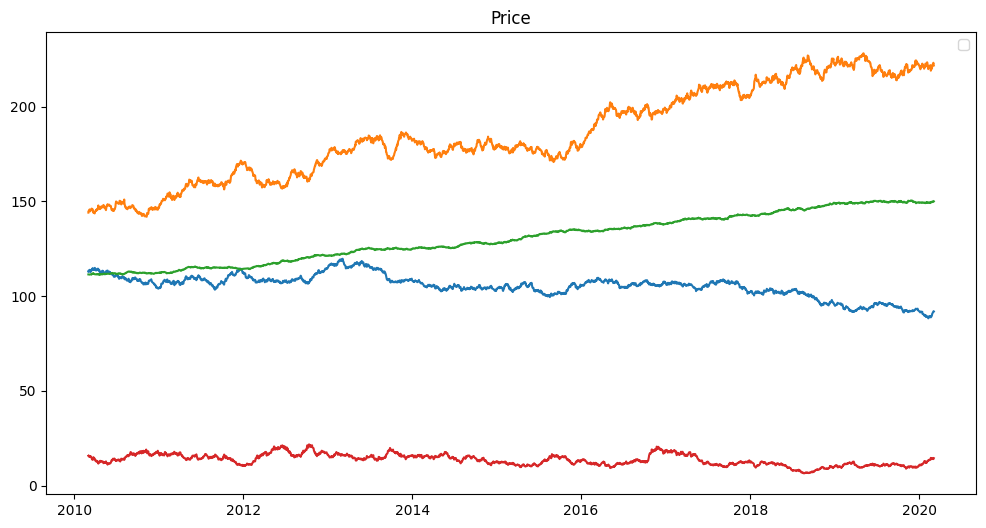

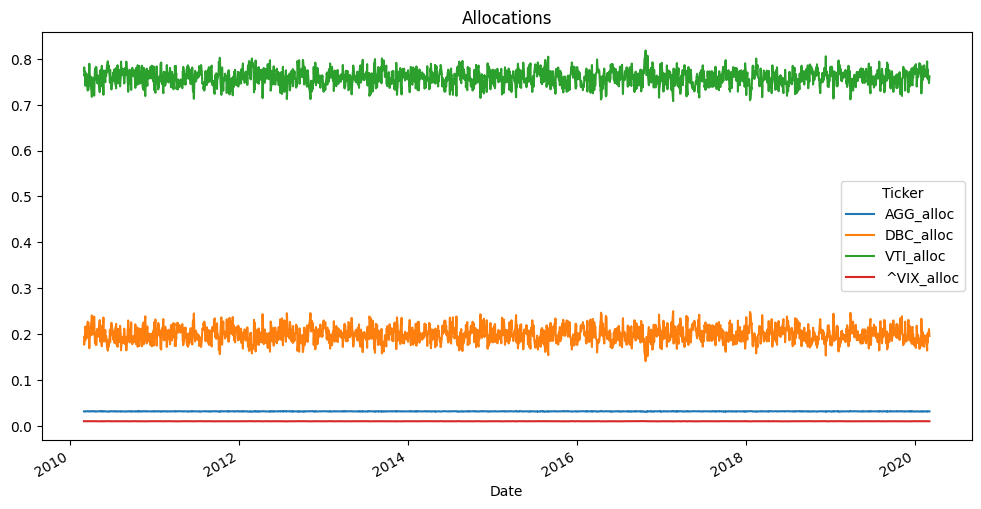

nb de jours d'investissement: 2520
annualized return: 0.031767410044376554
sharpe ratio: 1.9496650202430619
std deviation: 0.016107827518819964
downside_risk:  0.009415959551197742 


In [5]:
model = NN_Sharpe(model_name="LSTM",  input_size=4, hidden_size=32, output_size=4, num_layers=1, temperature=0.07)

trainer = Trainer(model, synthetic=True, weight_decay=0.5, scheduler_gamma=0., lr=0.01, randomstate=0)

out = trainer.train(verbose=True, epochs=100, overlap=True, batch_size=64, rolling_window=252, retrain_years=2, initial_train_years=4)

plot_results(out, trainer)
#trainer.plot_results(out)

[*********************100%***********************]  4 of 4 completed


Training period from 2006-03-01 00:00:00 to 2010-03-03 00:00:00
Investment period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00


100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Training period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00
Investment period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00


100%|██████████| 200/200 [00:02<00:00, 74.65it/s]


Training period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00
Investment period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00


100%|██████████| 200/200 [00:02<00:00, 74.87it/s]


Training period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00
Investment period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00


100%|██████████| 200/200 [00:02<00:00, 72.05it/s]


Training period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00
Investment period from 2018-03-06 00:00:00 to 2020-03-06 00:00:00


100%|██████████| 200/200 [00:02<00:00, 74.67it/s]
/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


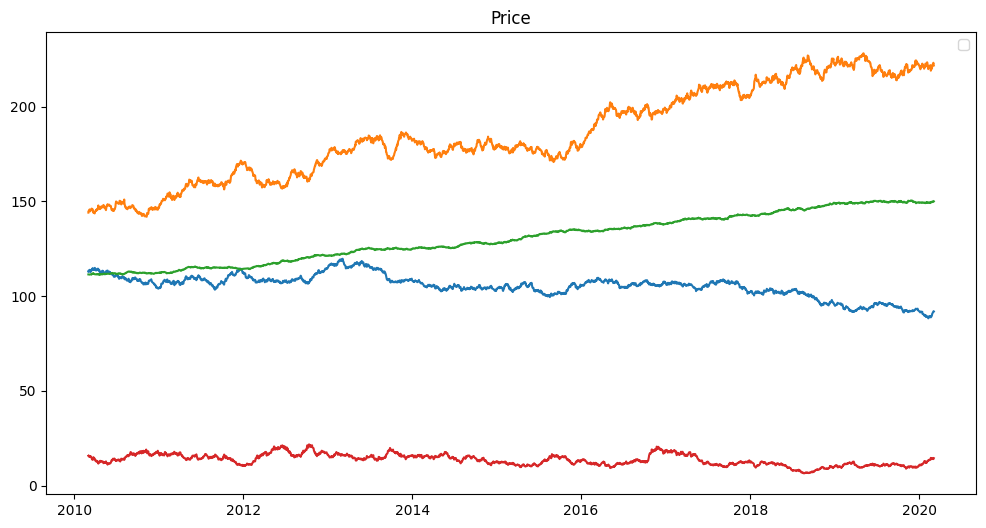

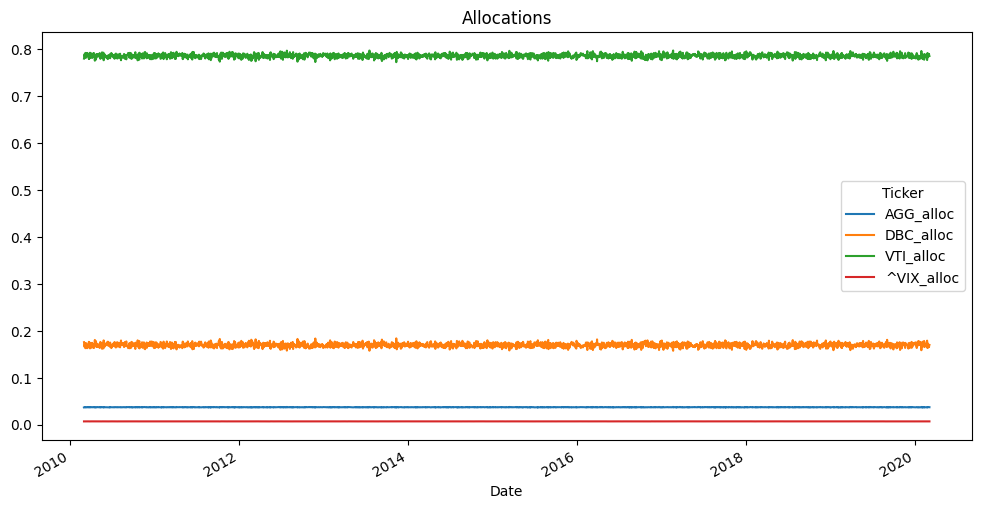

nb de jours d'investissement: 2520
annualized return: 0.031273506585804745
sharpe ratio: 1.9663916069068903
std deviation: 0.015724179379663646
downside_risk:  0.009121359770733228 


In [8]:
model = NN_Sharpe(model_name="RNN",  input_size=4, hidden_size=32, output_size=4, num_layers=1, temperature=0.07)

trainer = Trainer(model, synthetic=True, weight_decay=0.5, scheduler_gamma=0, lr=0.01, randomstate=0)

out = trainer.train(verbose=True, epochs=200, overlap=True, batch_size=64, rolling_window=252, retrain_years=2, initial_train_years=4)

plot_results(out, trainer)
#trainer.plot_results(out)

[*********************100%***********************]  4 of 4 completed


Training period from 2006-03-01 00:00:00 to 2010-03-03 00:00:00
Investment period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00


100%|██████████| 200/200 [00:08<00:00, 24.29it/s]


Training period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00
Investment period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00


100%|██████████| 200/200 [00:02<00:00, 76.13it/s]


Training period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00
Investment period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00


100%|██████████| 200/200 [00:02<00:00, 75.89it/s]


Training period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00
Investment period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00


100%|██████████| 200/200 [00:02<00:00, 75.58it/s]


Training period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00
Investment period from 2018-03-06 00:00:00 to 2020-03-06 00:00:00


100%|██████████| 200/200 [00:02<00:00, 71.53it/s]
/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


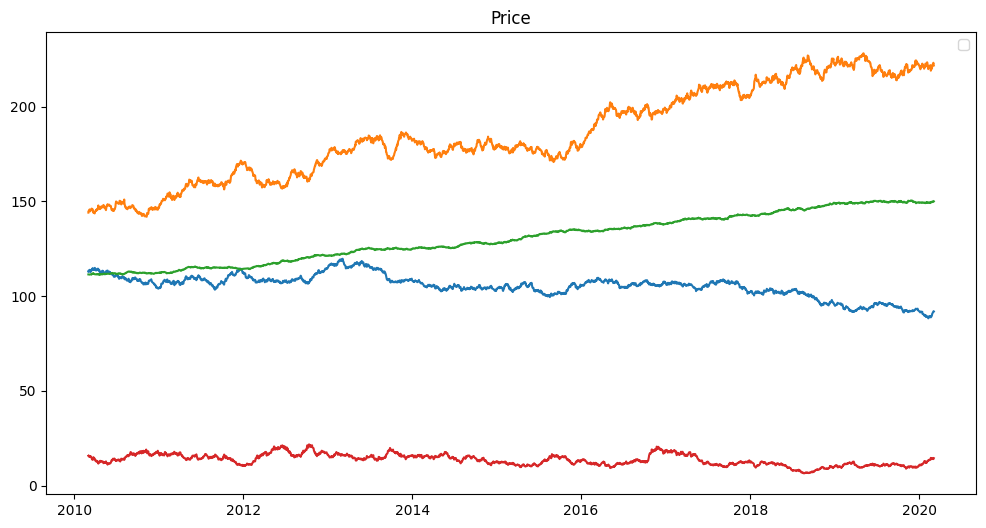

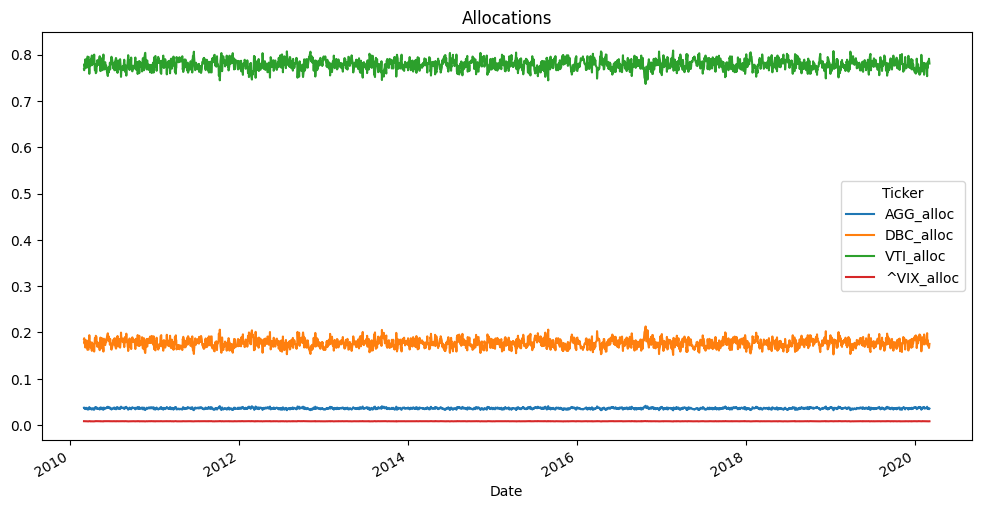

nb de jours d'investissement: 2520
annualized return: 0.031572937179908056
sharpe ratio: 1.983500398250831
std deviation: 0.01573501482647129
downside_risk:  0.009100791667037575 


In [9]:
model = NN_Sharpe(model_name="GRU",  input_size=4, hidden_size=32, output_size=4, num_layers=1, temperature=0.07)

trainer = Trainer(model, synthetic=True, weight_decay=0.5, scheduler_gamma=0, lr=0.01, randomstate=0)

out = trainer.train(verbose=True, epochs=200, overlap=True, batch_size=64, rolling_window=252, retrain_years=2, initial_train_years=4)

plot_results(out, trainer)
#trainer.plot_results(out)

#### Markowitz portfolio optimization

/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


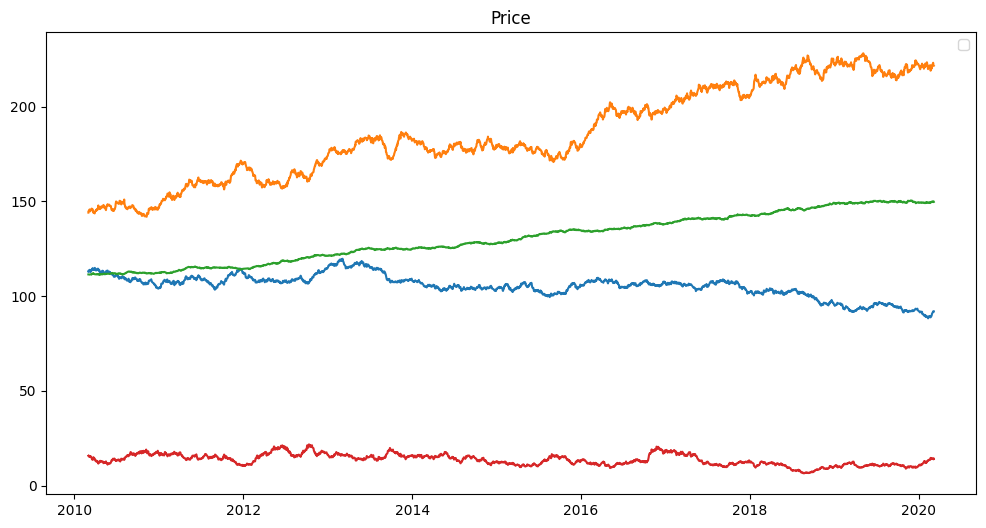

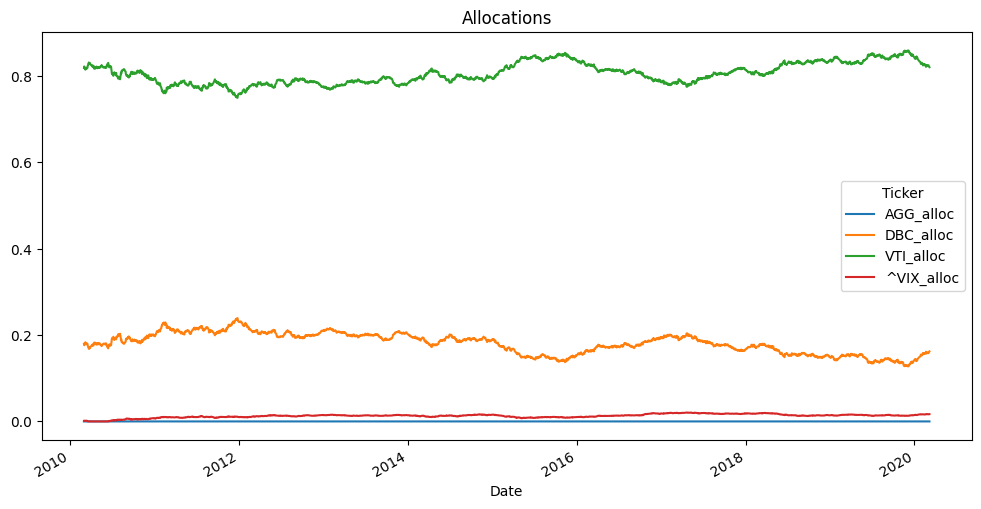

nb de jours d'investissement: 2521
annualized return: 0.03226451246449891
sharpe ratio: 2.052911213274674
std deviation: 0.015527919283194051
downside_risk:  0.009024290748675997 


In [10]:
out = trainer.markov_portfolio(rolling_window=2000)
plot_results(out, trainer)

We can see here that both model lead to an allocation around [0.75, 0.25, 0, 0] (which is the solution that maximise the expectation of the sharp ratio on this setup)


We see that the LSTM model is pretty close to the optimal solution on this framework. But now we can see if the LSTM have better results on real data, where we have no garentee that the markowitz portfolio is optimal (in the real world, the increments does not follow a perfect gaussian multivariate distribution...)

In [13]:
import cvxpy as cp

def compute_y_markowitz(mu, Sigma):

    y = cp.Variable(len(mu))

    objective = cp.Minimize(cp.quad_form(y, Sigma))

    constraints = [mu.T @ y == 1, y >= 0]

    problem = cp.Problem(objective, constraints)

    problem.solve()

    return y.value


y = compute_y_markowitz(mu, Sigma)

w = y / y.sum()

[round(x, 2) for x in w.tolist()]

[0.74, 0.0, 0.24, 0.03]

# Test on a real dataset

#### LSTM portfolio optimization

[*********************100%***********************]  4 of 4 completed


Training period from 2006-03-01 00:00:00 to 2010-03-03 00:00:00
Investment period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00


/home/onyxia/work/Advanced_ML_Ensae/src/dataset.py:142: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X_tensor = torch.tensor([df[0].values for df in data_training], dtype=torch.float32)
100%|██████████| 50/50 [00:05<00:00,  9.27it/s]


Training period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00
Investment period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00


100%|██████████| 50/50 [00:00<00:00, 64.10it/s]


Training period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00
Investment period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00


100%|██████████| 50/50 [00:00<00:00, 62.06it/s]


Training period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00
Investment period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00


100%|██████████| 50/50 [00:00<00:00, 63.98it/s]


Training period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00
Investment period from 2018-03-06 00:00:00 to 2020-03-06 00:00:00


100%|██████████| 50/50 [00:00<00:00, 71.12it/s]
/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


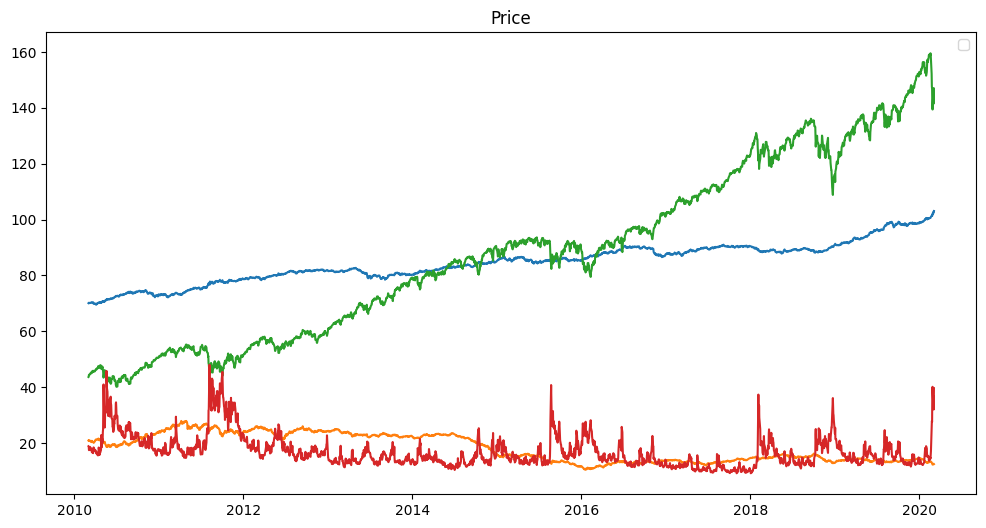

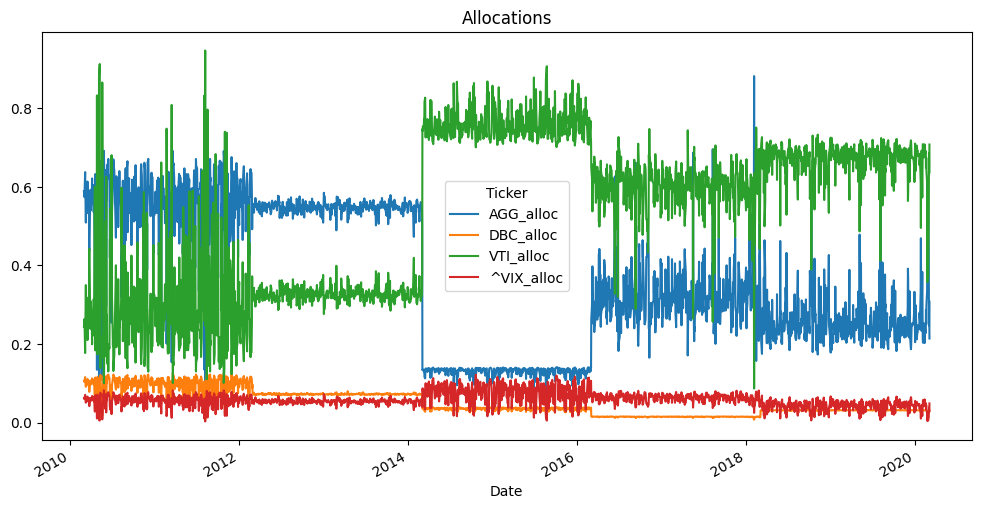

nb de jours d'investissement: 2520
annualized return: 0.15750542289873626
sharpe ratio: 2.303166623843968
std deviation: 0.06442265222336113
downside_risk:  0.043062938556749884 


In [2]:
model = NN_Sharpe(model_name="LSTM",  input_size=4, hidden_size=32, output_size=4, num_layers=1, temperature=0.07)

trainer = Trainer(model, weight_decay=0.8, scheduler_gamma=1, lr=0.001)

out_lstm = trainer.train(verbose=True, epochs=50, overlap=True, batch_size=64, rolling_window=252, retrain_years=2, initial_train_years=4)

plot_results(out_lstm, trainer)

We can see how the loss is moving from the first period of training until the last one

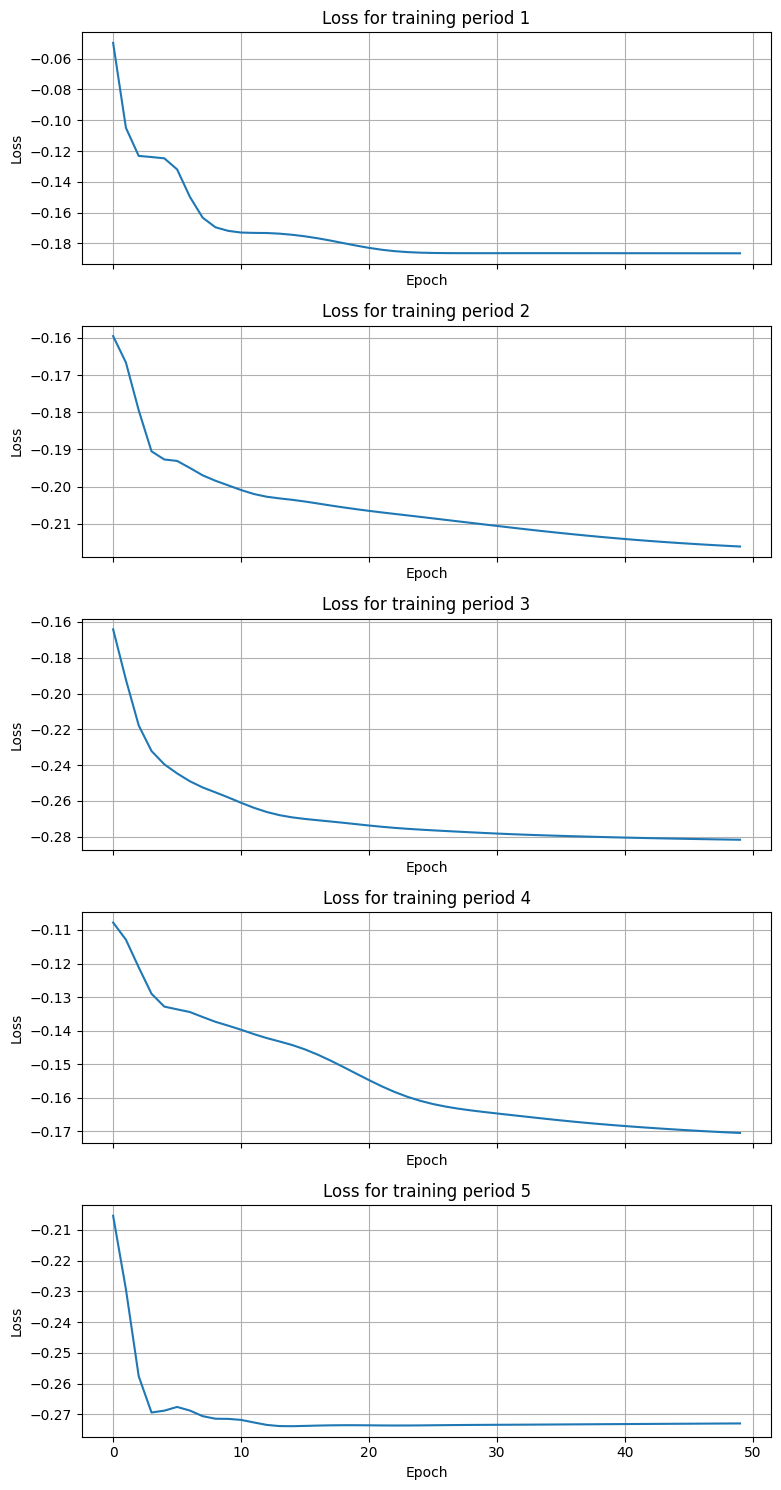

In [16]:
n_plots = len(trainer.logs)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 3 * n_plots), sharex=True)

for ax, (key, sub_dict) in zip(axes, trainer.logs.items()):
    loss = sub_dict.get('loss', [])
    ax.plot(loss)
    ax.set_title(f"Loss for training period {key+1}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.grid(True)

plt.tight_layout()
plt.show()

[*********************100%***********************]  4 of 4 completed


Training period from 2006-03-01 00:00:00 to 2010-03-03 00:00:00
Investment period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00


100%|██████████| 50/50 [00:02<00:00, 19.96it/s]


Training period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00
Investment period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00


100%|██████████| 50/50 [00:01<00:00, 49.42it/s]


Training period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00
Investment period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00


100%|██████████| 50/50 [00:00<00:00, 51.74it/s]


Training period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00
Investment period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00


100%|██████████| 50/50 [00:01<00:00, 49.36it/s]


Training period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00
Investment period from 2018-03-06 00:00:00 to 2020-03-06 00:00:00


100%|██████████| 50/50 [00:01<00:00, 49.97it/s]
/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


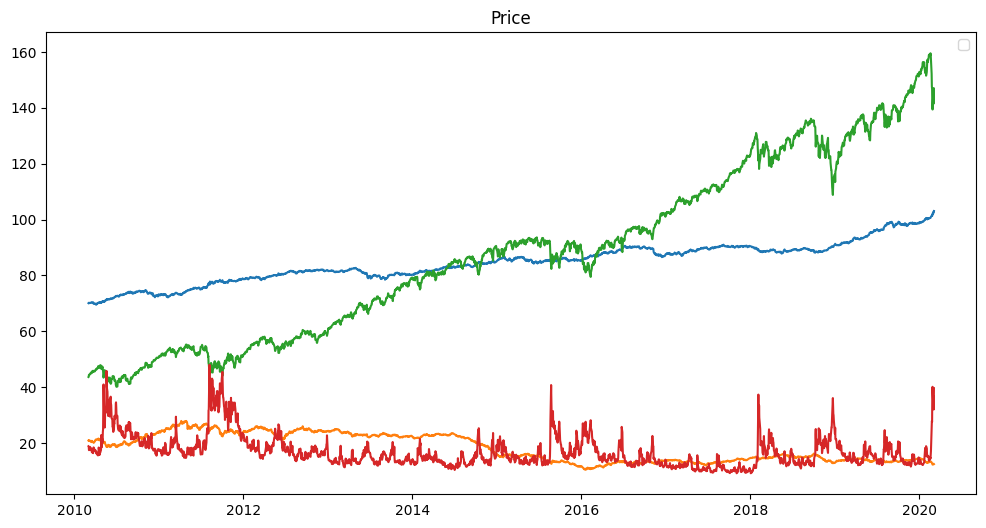

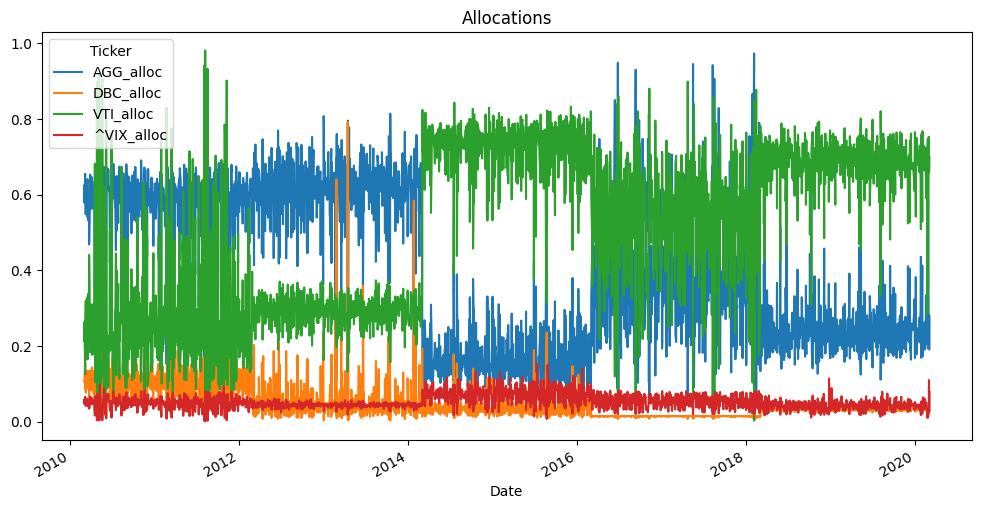

nb de jours d'investissement: 2520
annualized return: 0.1440844253786242
sharpe ratio: 2.223757153803234
std deviation: 0.061389597790182236
downside_risk:  0.04020542784635995 


In [3]:
model = NN_Sharpe(model_name="RNN",  input_size=4, hidden_size=32, output_size=4, num_layers=1, temperature=0.07)

trainer = Trainer(model, weight_decay=0.8, scheduler_gamma=1,  lr=0.001)

out_rnn = trainer.train(verbose=True, epochs=50, overlap=True, batch_size=64, rolling_window=252, retrain_years=2, initial_train_years=4)

plot_results(out_rnn, trainer)

[*********************100%***********************]  4 of 4 completed


Training period from 2006-03-01 00:00:00 to 2010-03-03 00:00:00
Investment period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00


100%|██████████| 50/50 [00:03<00:00, 16.52it/s]


Training period from 2010-03-03 00:00:00 to 2012-03-01 00:00:00
Investment period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00


100%|██████████| 50/50 [00:00<00:00, 51.40it/s]


Training period from 2012-03-01 00:00:00 to 2014-03-05 00:00:00
Investment period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00


100%|██████████| 50/50 [00:01<00:00, 47.70it/s]


Training period from 2014-03-05 00:00:00 to 2016-03-04 00:00:00
Investment period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00


100%|██████████| 50/50 [00:01<00:00, 49.25it/s]


Training period from 2016-03-04 00:00:00 to 2018-03-06 00:00:00
Investment period from 2018-03-06 00:00:00 to 2020-03-06 00:00:00


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]
/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


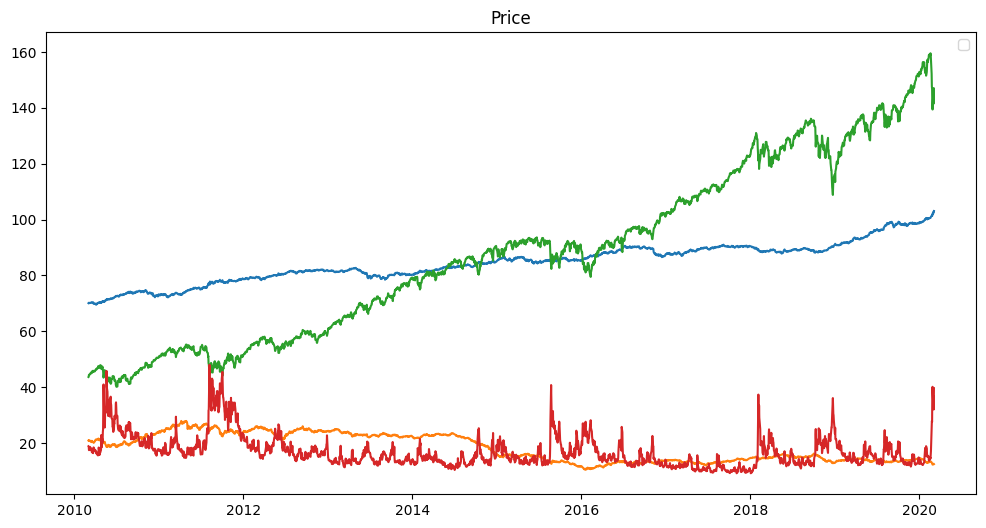

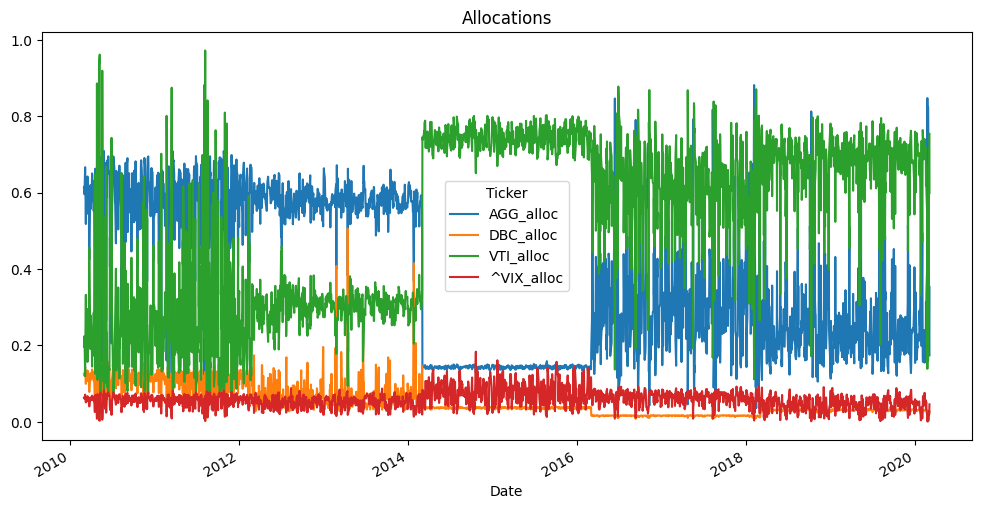

nb de jours d'investissement: 2520
annualized return: 0.17050785901501908
sharpe ratio: 2.4215149740432853
std deviation: 0.06593040970078495
downside_risk:  0.04474181874511939 


In [4]:
model = NN_Sharpe(model_name="GRU",  input_size=4, hidden_size=32, output_size=4, num_layers=1, temperature=0.07)

trainer = Trainer(model, weight_decay=0.8, scheduler_gamma=1, lr=0.001)


out_gru = trainer.train(verbose=True, epochs=50, overlap=True, batch_size=64, rolling_window=252, retrain_years=2, initial_train_years=4)

plot_results(out_gru, trainer)


#### Markowitz Portfolio optimization

/home/onyxia/work/Advanced_ML_Ensae/src/viz.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


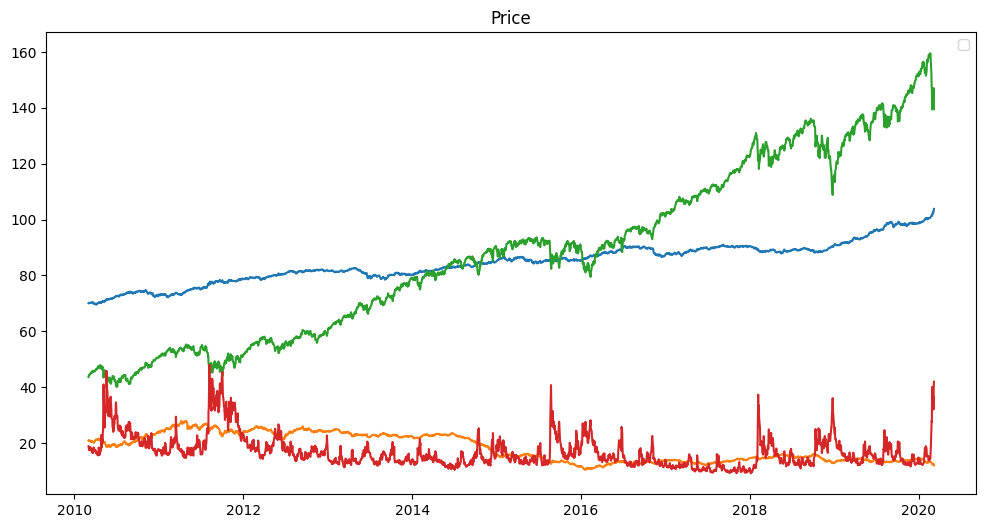

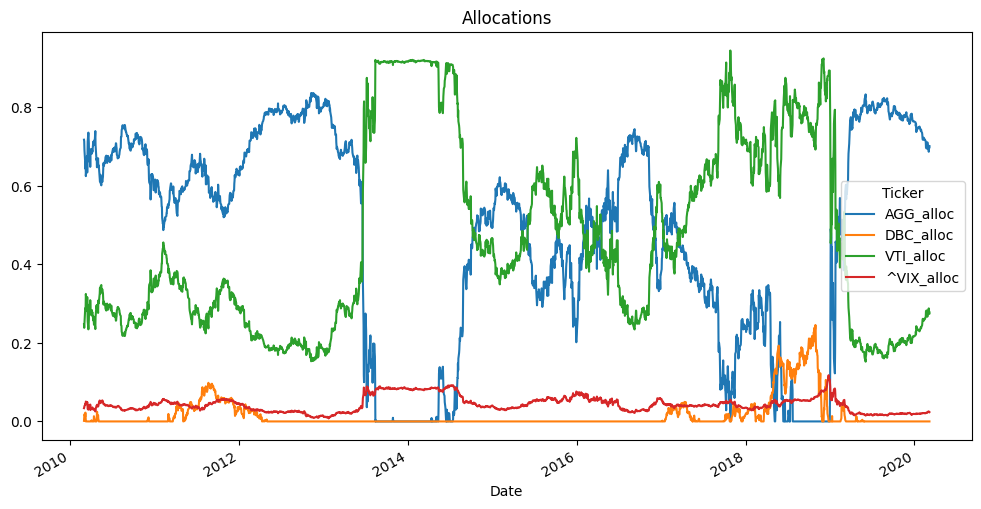

nb de jours d'investissement: 2521
annualized return: 0.10043717621512771
sharpe ratio: 2.1994663415469917
std deviation: 0.043961172127517906
downside_risk:  0.031892035948089446 


In [5]:
out_markowitz = trainer.markov_portfolio(rolling_window=300)
plot_results(out_markowitz, trainer)

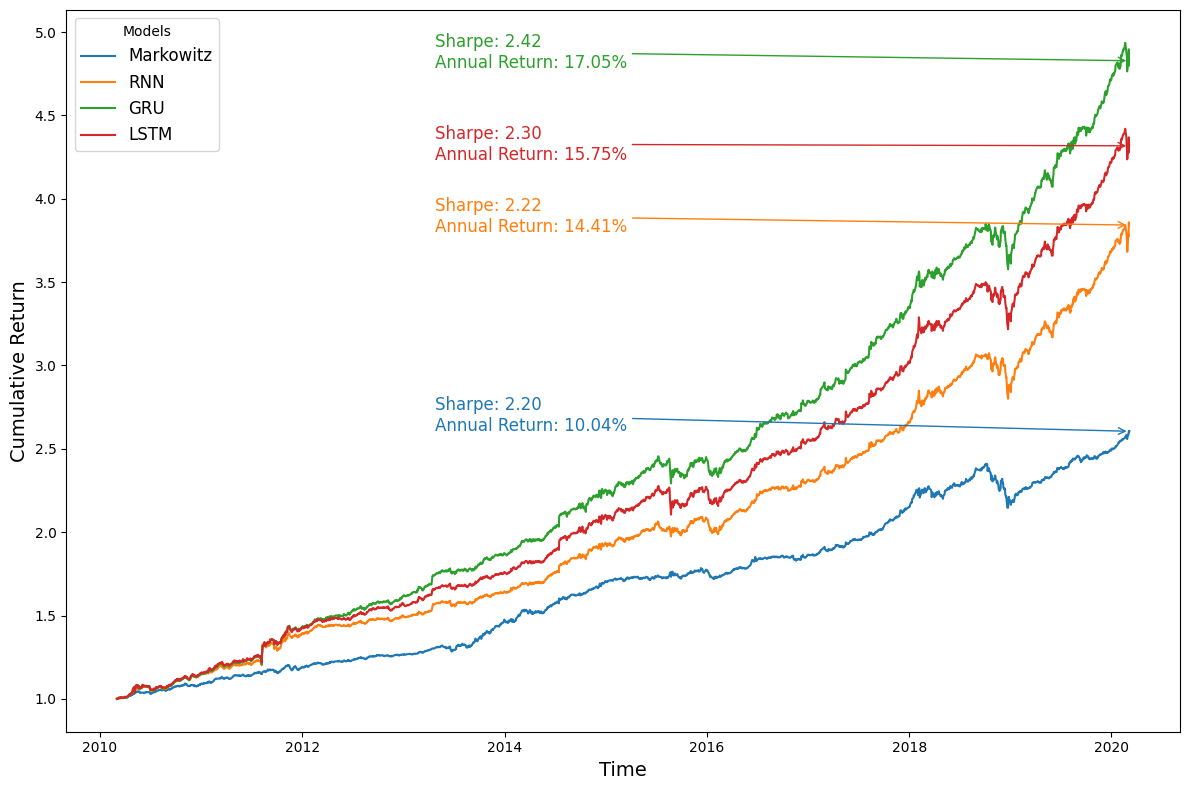

In [6]:
list_results = [out_markowitz, out_rnn, out_gru, out_lstm]
list_names = ["Markowitz", "RNN", "GRU", "LSTM"]

plot_cumulatives(list_results, list_names)

### Stack Plots

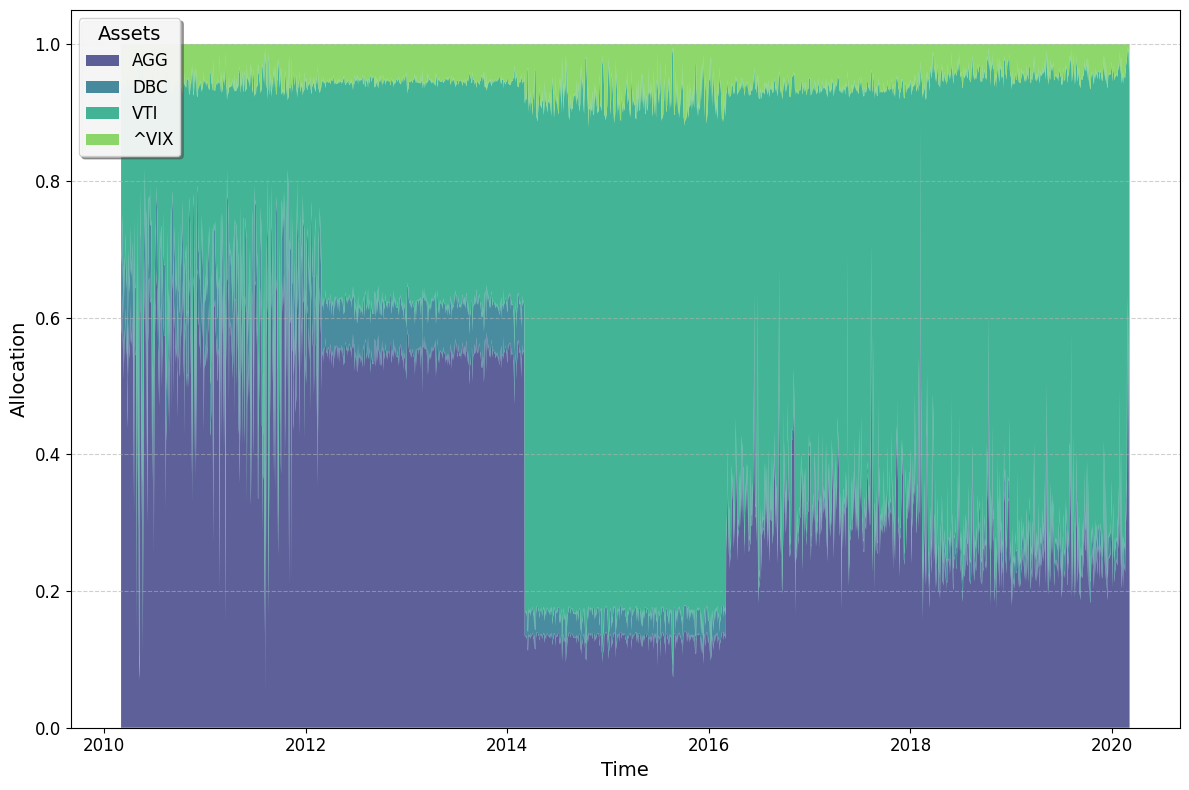

In [17]:
from src.viz import plot_stack

plot_stack(out_lstm)

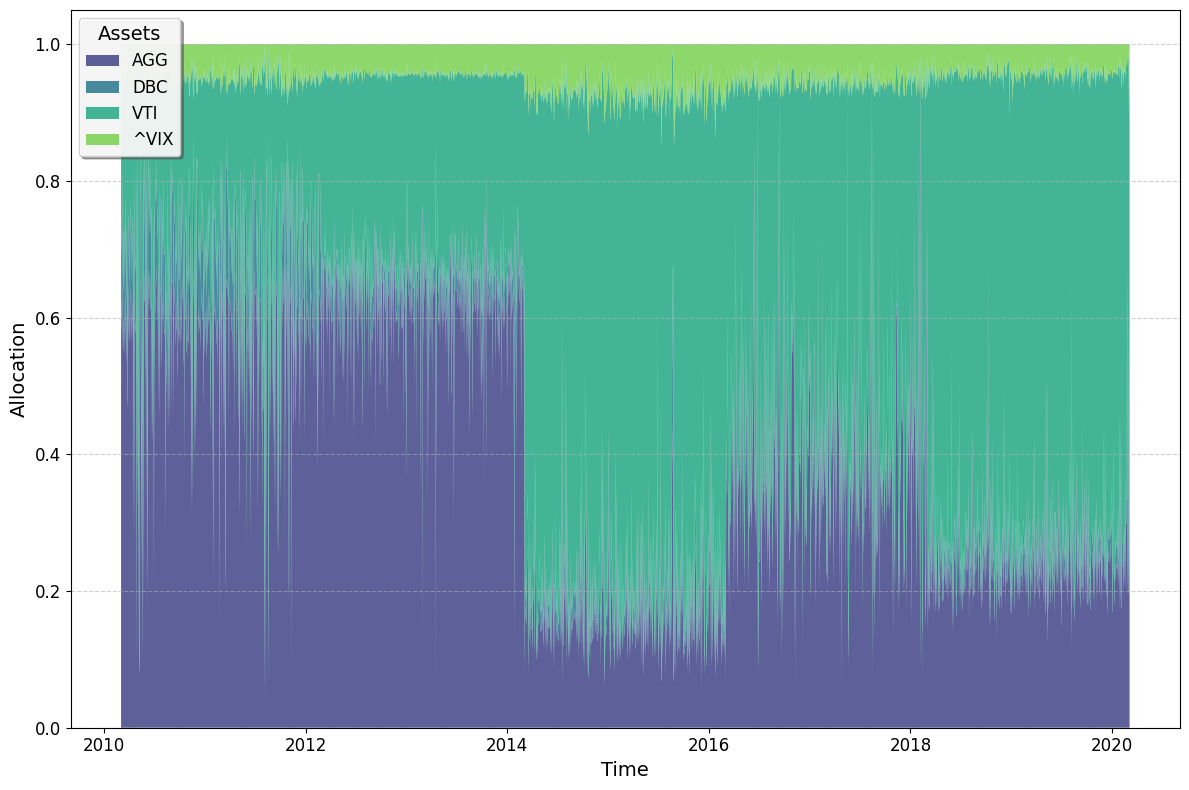

In [18]:
plot_stack(out_rnn)

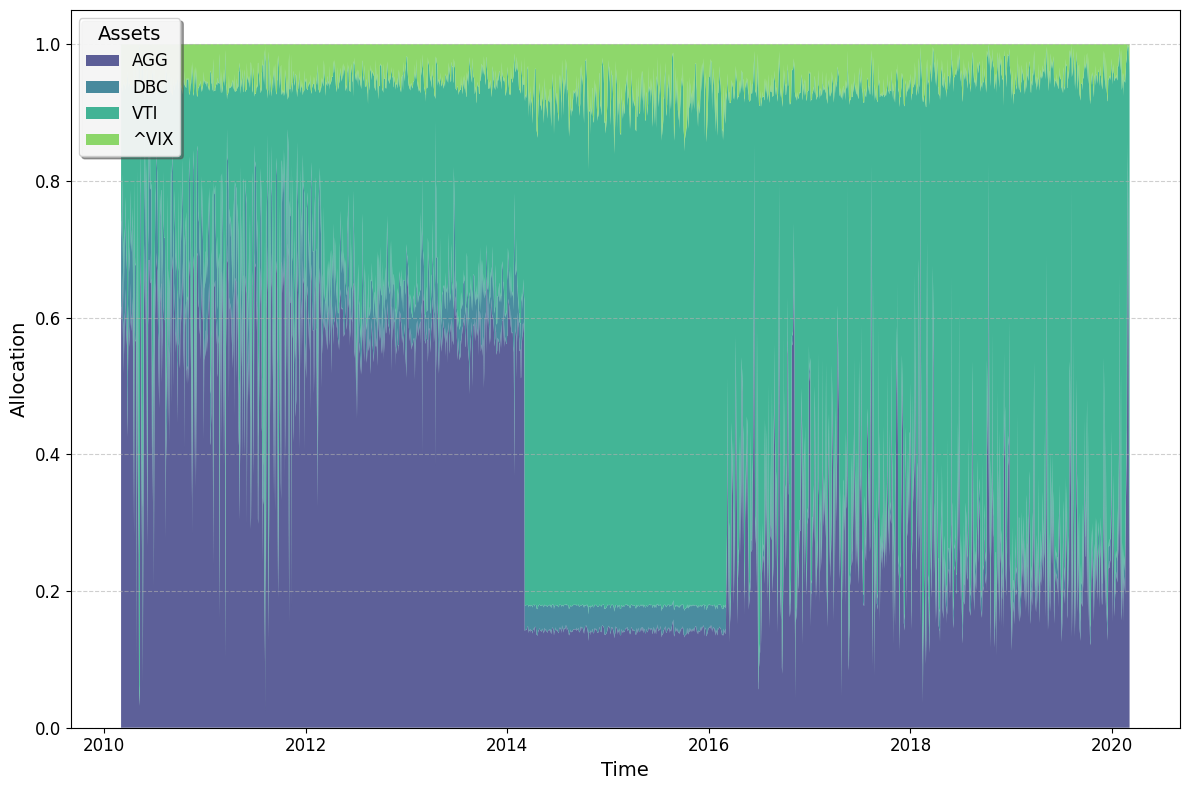

In [19]:
plot_stack(out_gru)

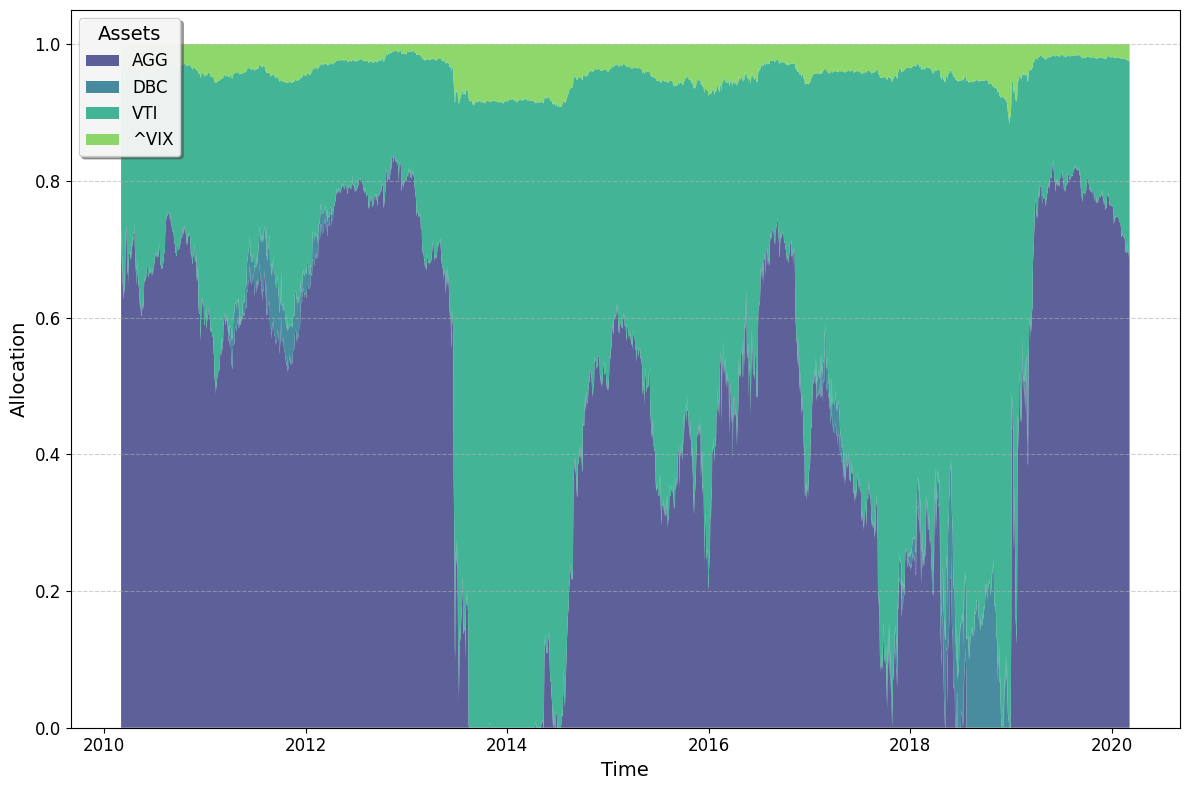

In [20]:
plot_stack(out_markowitz)